#Origem do DataSet

Transações efetuadas por cartões de crédito em setembro de 2013, em um intervalo de dois dias. Dentre todas as 284.807, somente 492 são  fraudulentas.

Os dados são anônimos e selecionados a partir de um PCA e contém apenas variáveis numéricas.

Observe que para aplicar uma solução na atualidade com um DNN treinado com esses dados, não traga um resultado muito satisfatório, já que o mercado e o fluxo de compras mudou drásticamente desde de 2013.

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import plotly.figure_factory as ff
from plotly.offline import iplot

In [66]:
df = pd.read_csv('/content/drive/MyDrive/Chromebook Wallpaper/creditcard.csv')

Pequena curiada nos dados do dataframe

In [67]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Entendendo sua estrutura

In [68]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [69]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [70]:
j=0
for i in df.isnull().sum():
    if i > 0:
        print(i)
        j+=1

if j == 0:
    print("Não possui nulos! rsrs")

Não possui nulos! rsrs


##Com o Info e o Describe, podemos ver que nenhuma coluna possui valores nulos. A partir disso, podemos explorar sem preocupações.

##Visualização das distribuições


In [91]:
df['Hour'] = df['Time'].apply(lambda x: np.floor(x / 3600))

#Entender a diferença entre as classes


In [97]:
#Relação tempo x transações
fraude = df.loc[df['Class'] == 1]['Time']
normal = df.loc[df['Class'] == 0]['Time']

uniao = [normal, fraude]
rotulo = ['Normal', 'Fraude']

fig = ff.create_distplot(uniao, rotulo, show_hist=False, show_rug=False)
fig['layout'].update(xaxis=dict(title='Tempo'))

iplot(fig, filename='dist_only')

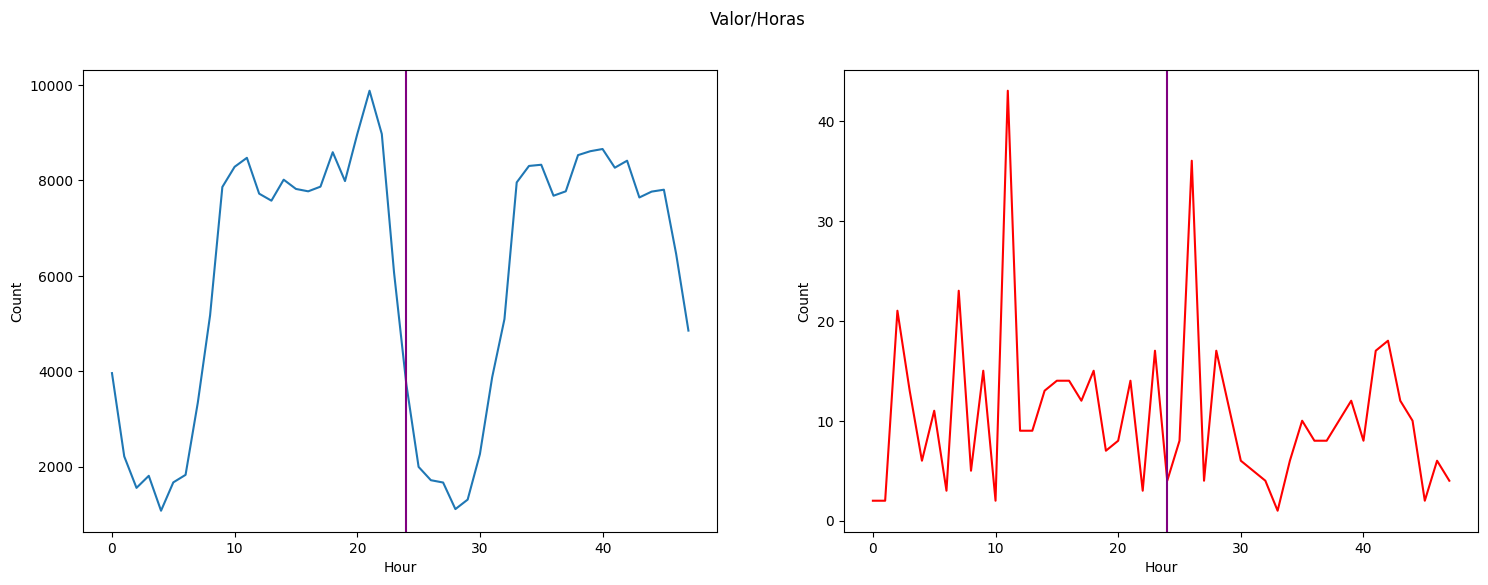

In [96]:
tmp = df.groupby(['Hour', 'Class'])['Amount'].aggregate(['sum', 'count']).reset_index()
data_df = pd.DataFrame(tmp)
data_df.columns = ['Hour', 'Class', 'Sum', 'Count']

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Count", data=data_df.loc[data_df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Count", data=data_df.loc[data_df.Class==1], color="red")
ax1.axvline(24, color='purple')
ax2.axvline(24, color='purple')
plt.suptitle("Valor/Horas")
plt.show();

Enquanto as transações classificadas como normal possuem um forte padrão nos horários (grande queda durante a madrugada), as transações fraudulentas são mais estáveis e aparentam não ter um padrão claro.

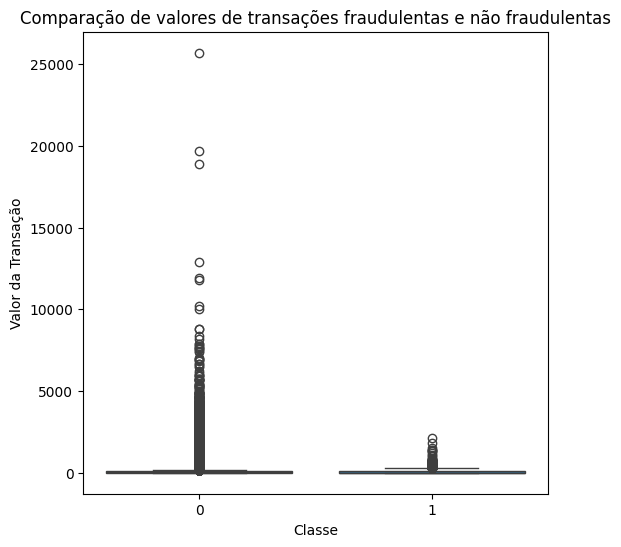

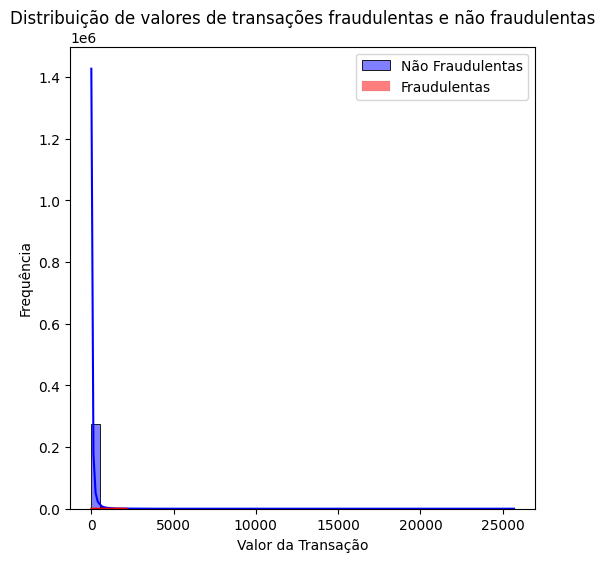

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot para comparar valores de transações fraudulentas e não fraudulentas
plt.figure(figsize=(6, 6))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Comparação de valores de transações fraudulentas e não fraudulentas')
plt.xlabel('Classe')
plt.ylabel('Valor da Transação')
plt.show()

# Histograma para comparar a distribuição dos valores de transações
plt.figure(figsize=(6, 6))
sns.histplot(df[df['Class'] == 0]['Amount'], bins=50, kde=True, color='blue', label='Não Fraudulentas')
sns.histplot(df[df['Class'] == 1]['Amount'], bins=50, kde=True, color='red', label='Fraudulentas')
plt.title('Distribuição de valores de transações fraudulentas e não fraudulentas')
plt.xlabel('Valor da Transação')
plt.ylabel('Frequência')
plt.legend()
plt.show()


Os valores das transações fraudulentas são menores que as transações normais.

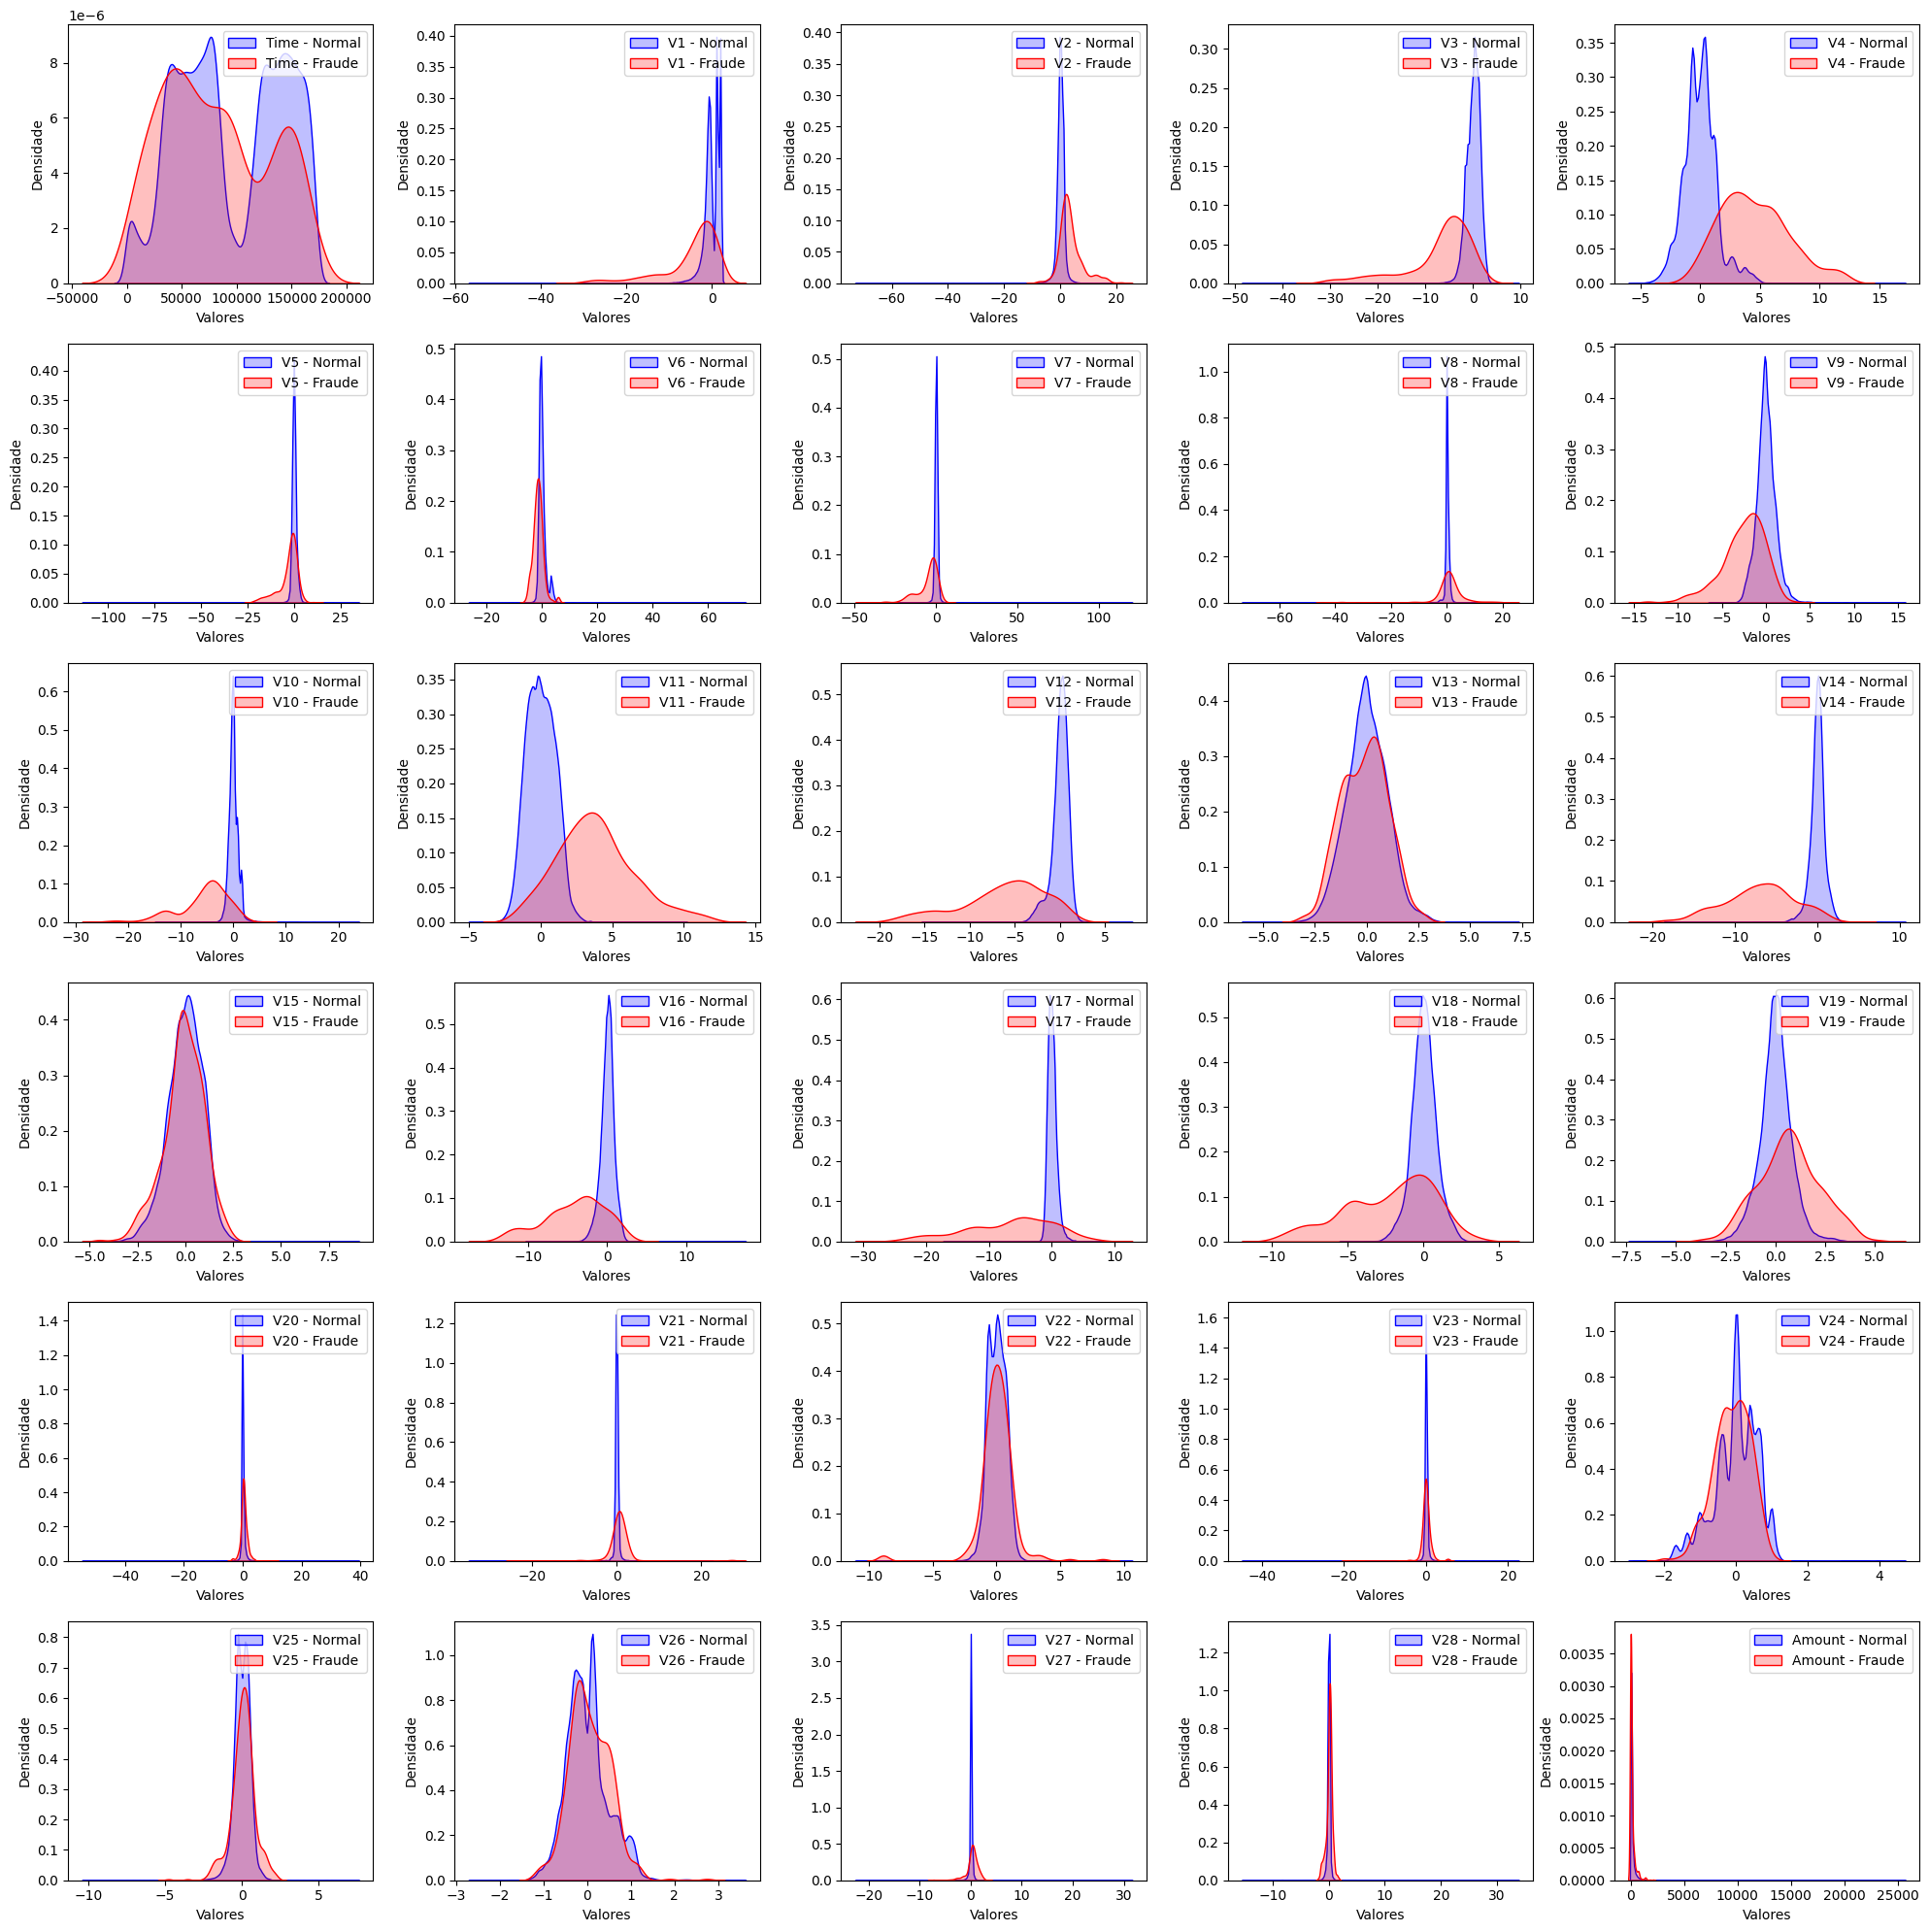

In [114]:
class_0 = df[df['Class'] == 0]
class_1 = df[df['Class'] == 1]

f, axes = plt.subplots(nrows=6, ncols=5, figsize=(20, 20))

for ax, feature in zip(axes.flatten(), df.columns):
    if feature != 'Class':  # Ignora a coluna 'Class'
        sns.kdeplot(class_0[feature], label=f'{feature} - Normal', fill=True, ax=ax, color='blue')
        sns.kdeplot(class_1[feature], label=f'{feature} - Fraude', fill=True, ax=ax, color='red')
        ax.set_xlabel('Valores')
        ax.set_ylabel('Densidade')
        ax.legend()

plt.tight_layout()
plt.show()


Temos uma surpresa quando observamos as Distribuições de Densidade de cada classe. É possível ver claramento dois grupos distintos.

Issa observação me traz uma dúvida, e eu me pergunto "Essas features devem possuir um grande peso na hora de definir a classe".

Com a pesquisa, eu descubro que a distribuição de densidade não trauz fielmente esta dependência.

E aqui surge minha hipótese

##Certos features possuem um peso altissimo na hora da decisão da classe

Então vamos para a experimentação

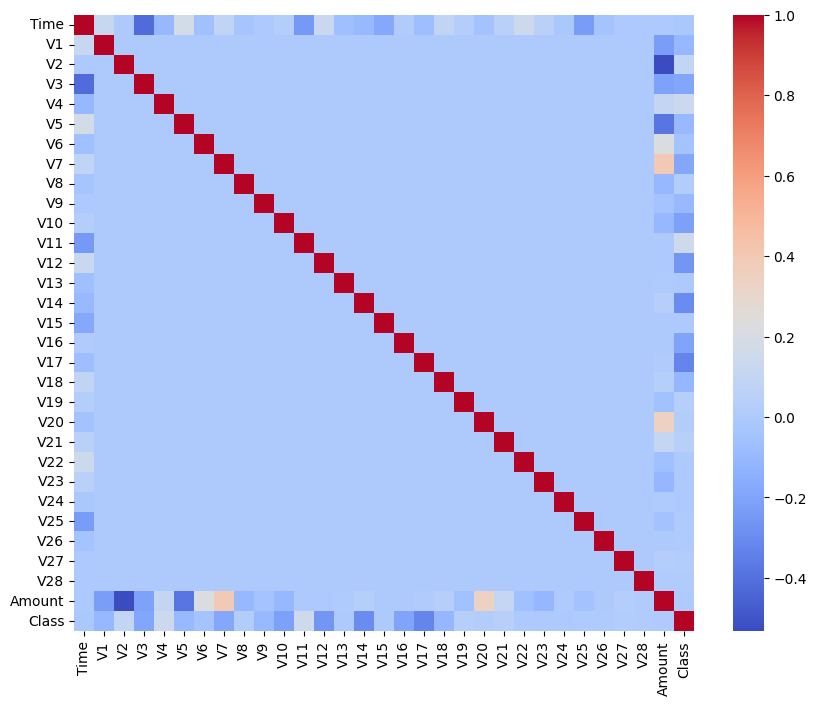

In [ ]:
#Análise da correlação de entre todas as variáveis
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.show()

Analisando a correlação entre as variáveis de forma linear, vemos que elas quase não relacionam entre si.

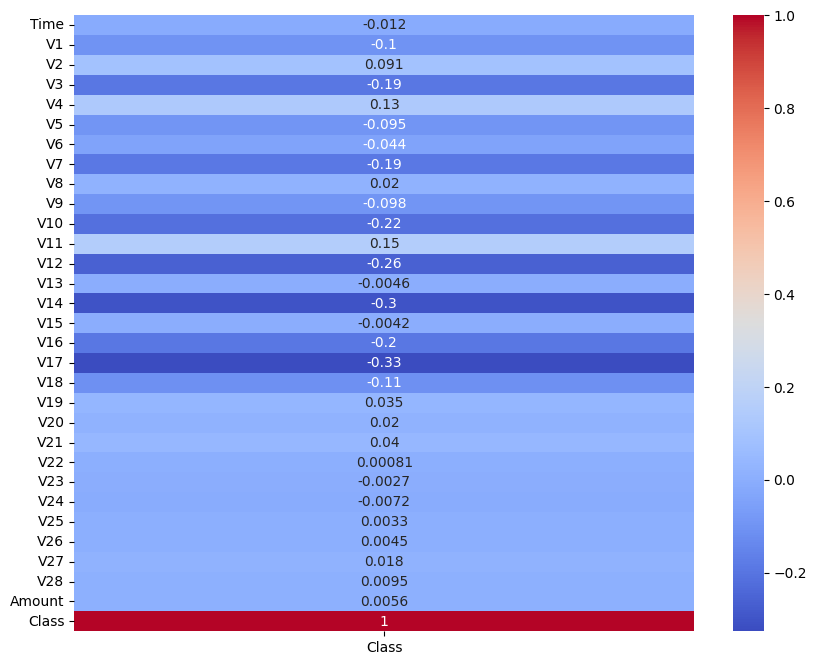

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr()[['Class']], annot=True, cmap='coolwarm')
plt.show()

Analisando especificamente as correlações dos outros fetures com a Classe, vemos que todas possuem um valo baixíssimo, não passando de 0.2

Isso foge um pouco da confirmação de nossa hipótese, era esperado um grau maior de correlação entre essas variáveis. Ainda mais quando comparado com os gráficos de densidade.

Com uma simples análise linear dessas variáveis não é possível absorver nada, ainda mais quando elas se relacionam tão profundamente, como no caso de transações bancárias.

Então vamos fazer mais uma experimentação com Classificadores de Floresta Aleatórias.

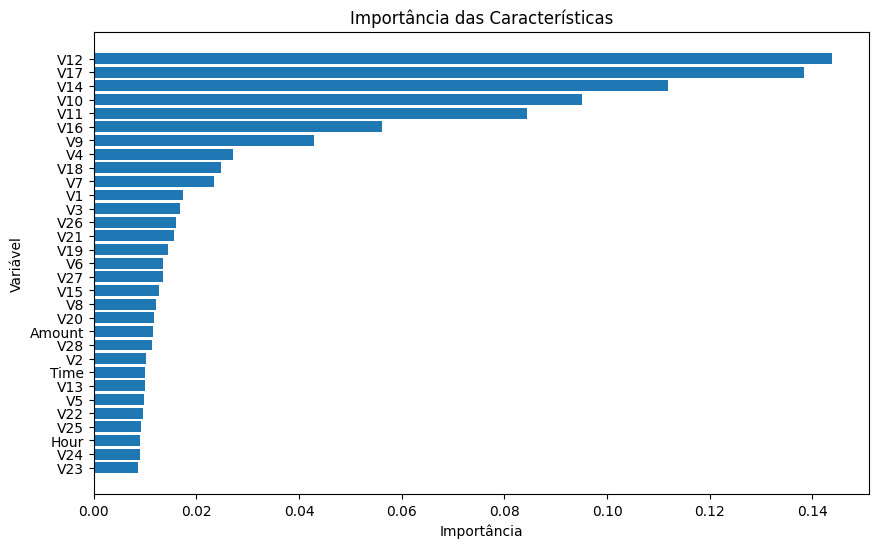

In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Supondo que 'df' é seu DataFrame e 'Class' é a coluna alvo
X = df.drop('Class', axis=1)  # todas as colunas exceto a coluna alvo
y = df['Class']  # apenas a coluna alvo

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instanciar e treinar o modelo de Floresta Aleatória
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Obter a importância das características
feature_importances = model.feature_importances_

# Criar um DataFrame para visualizar as importâncias
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plotar as importâncias das características
plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'], features_df['Importance'])
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.title('Importância das Características')
plt.gca().invert_yaxis()
plt.show()


Após a análise dos nossos resultados (dados), podemos concluir que:

##As distribuições de densidade extremamente distintas resultam sim em um maior grau de importância de uma variável na hora de determinar a classe, confirmando nossa hipótese.

Isso fica claro ao compararmos as 5 maiores features obtidos na Árvore aleatória com os gráficos das densidades.